In [2]:
from sympy import symbols, Eq, solve

P_pass = symbols('P_pass')
P_quick_given_pass = 0.6
P_quick_given_not_pass = 0.3
P_pass_given_quick = 0.9

P_not_pass = 1 - P_pass
equation = Eq(P_pass_given_quick, (P_quick_given_pass * P_pass) / (P_quick_given_pass * P_pass + P_quick_given_not_pass * P_not_pass))

P_pass_value = solve(equation, P_pass)[0]

P_pass_value


0.818181818181818

In [7]:
from sympy import symbols

alpha = symbols('alpha1 alpha2 alpha3')  
x = symbols('x1 x2 x3')  

posterior_params = [alpha[i] + x[i] for i in range(3)]

print("Posterior distribution is Dirichlet with parameters:")
for i, param in enumerate(posterior_params):
    print(f"alpha_{i+1} =", param)

Posterior distribution is Dirichlet with parameters:
alpha_1 = alpha1 + x1
alpha_2 = alpha2 + x2
alpha_3 = alpha3 + x3


Multinomial sample: [25 56 19]


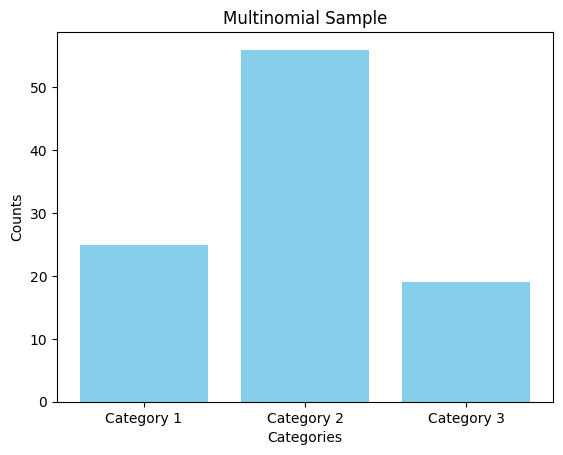

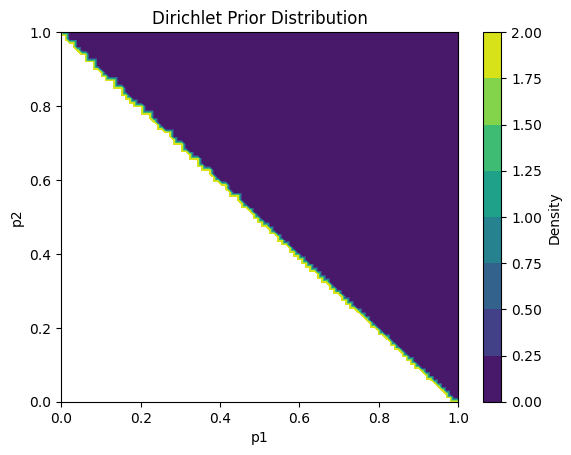

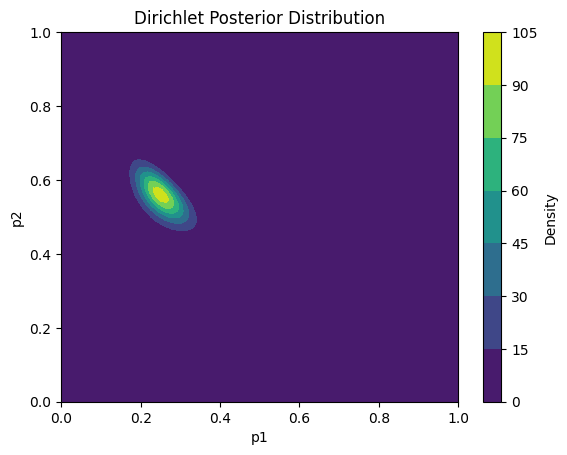

In [6]:
import numpy as np
from scipy.stats import dirichlet, multinomial
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation


n = 100  
p = [0.3, 0.5, 0.2]  


sample = multinomial.rvs(n=n, p=p, size=1)[0]
print("Multinomial sample:", sample)

categories = ["Category 1", "Category 2", "Category 3"]
plt.bar(categories, sample, color="skyblue")
plt.title("Multinomial Sample")
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.show()

alpha_prior = [1.0, 1.0, 1.0]

def plot_ternary_contour(alpha, title):
    
    p1 = np.linspace(0, 1, 100)
    p2 = np.linspace(0, 1, 100)
    p1, p2 = np.meshgrid(p1, p2)
    p3 = 1 - p1 - p2
    valid = (p1 >= 0) & (p2 >= 0) & (p3 >= 0)  
    
    
    pdf = np.zeros_like(p1)
    for i in range(p1.shape[0]):
        for j in range(p1.shape[1]):
            if valid[i, j]:
                pdf[i, j] = dirichlet.pdf([p1[i, j], p2[i, j], p3[i, j]], alpha)

   
    plt.tricontourf(Triangulation(p1.flatten(), p2.flatten()), pdf.flatten(), cmap="viridis")
    plt.title(title)
    plt.xlabel("p1")
    plt.ylabel("p2")
    plt.colorbar(label="Density")
    plt.show()


plot_ternary_contour(alpha_prior, "Dirichlet Prior Distribution")

alpha_posterior = [alpha_prior[i] + sample[i] for i in range(3)]

plot_ternary_contour(alpha_posterior, "Dirichlet Posterior Distribution")
